# Binning: Cómo agrupar datos numéricos con Pandas
## Discretización de variables numéricas con Pandas: between, cut, qcut y value counts

### Introducción

Discretización, también conocida como *Bucketing* o *Binning*, es una técnica común de preprocesamiento de datos que se utiliza para agrupar intervalos de datos continuos en "contenedores" o "cubos". En esta clase, analizaremos 4 métodos para agrupar valores numéricos utilizando **Pandas**.

### Métodos

Creamos los siguientes datos con fines ilustrativos.

In [ ]:
import pandas as pd
import numpy as np

def create_df():
  df = pd.DataFrame({'score': np.random.randint(0,101,1000)})
  return df

df = create_df()
df.head()

,score
0,4
1,32
2,9
3,19
4,18


Los datos simulan puntajes académicos que van de 0 a 100 para 1000 estudiantes. El objetivo es agrupar las puntuaciones numéricas en grados como "A", "B" y "C", donde "A" es la mejor calificación y "C" es la peor calificación.

## 1. between & loc
El método Pandas `.between` devuelve un vector booleano que contiene `True` siempre que el elemento `Series` correspondiente se encuentre entre los límites izquierdo y derecho.

### Parámetros

     `left`: límite izquierdo
     `right`: límite derecho
     `inclusive`: Especifica el límite a incluir. Los valores esperados son: `{“both”, “neither”, “left”, “right”}`

Vamos a agrupar la puntuación de estudiantes en calificaciones según los siguientes intervalos:

*     A: (80, 100]
*     B: (50, 80]
*     C: [0, 50]

Donde los corchetes `[` indican que el valor límite es **inclusivo** y los paréntesis `)` límite exclusivo.

Identificamos qué puntaje se encuentran entre los intervalos de interés y le asignamos los valores de grado correspondientes. Para el grado "A" y "B" solo el límite derecho es inclusivo, por lo que pasamos directamente al parámetro inclusivo. Para el grado "C", ambos límites son inclusivos, por lo que pasamos ambos al parámetro inclusivo.

In [ ]:
df.loc[df['score'].between(0, 50, 'both'), 'grado_loc_between'] = 'C'
df.loc[df['score'].between(50, 80, 'right'), 'grado_loc_between'] = 'B'
df.loc[df['score'].between(80, 100, 'right'), 'grado_loc_between'] = 'A'
df.sample(12)
# Crear variables a partir de variables existentes

,score,grado_loc_between
430,30,C
913,70,B
70,14,C
203,96,A
53,25,C
440,58,B
128,12,C
309,75,B
958,18,C
84,17,C


Ahora veamos el número de estudiantes en cada *bin*.

In [ ]:
df['grado_loc_between'].value_counts()

C    505
B    311
A    184
Name: grado_loc_between, dtype: int64

Este método requiere una línea de código para cada *bin*, por lo que solo es adecuado para cierto número manejable de casos.

## 2. cut
La función `cut` ubica valores según intervalos discretos, segmentando y ordenando valores de datos en *bins*. Esta función también es útil para pasar de una variable **continua** a una variable **categórica**.

A continuación usamos esta función para clasificar evaluaciones de estudiantes según los mismos intervalos que en el ejemplo anterior. Estos son los parámetros que se utilizan:

* `x`: la matriz de entrada que se va a agrupar. Debe ser unidimensional.

* `bins`: Secuencia de escalares: define los bordes del *bin*, (permiten un rango no uniforme).

* `labels`: especifica las etiquetas para los *bins* devueltos. Debe tener la misma longitud que los *bins* resultantes.

* `include_lowest`: (`bool`) Especifica si el primer intervalo debe incluir el borde a la izquierda o no.

In [ ]:
mis_bins = [0, 50, 80, 100]
labels = ['C', 'B', 'A']
df['grado_cut'] = pd.cut(x = df['score'], bins = mis_bins,
                         labels = labels, include_lowest = True)
#df.sort_values(by=['score'], ascending=True)#.head(20)
df.sample(10)
# [0, 50]
# (50, 80]
# (80, 100]

,score,grado_loc_between,grado_cut
396,93,A,A
340,29,C,C
948,71,B,B
724,55,B,B
53,25,C,C
628,83,A,A
205,23,C,C
252,30,C,C
388,14,C,C
883,70,B,B


Aquí creamos una lista de *bins* que contiene los "bordes" y su respectiva lista de etiquetas (```labels```).

Nuevamente desplegamos el número de estudiantes por cada *bin*.

In [ ]:
df['grado_cut'].value_counts()

C    505
B    311
A    184
Name: grado_cut, dtype: int64

## 3. qcut
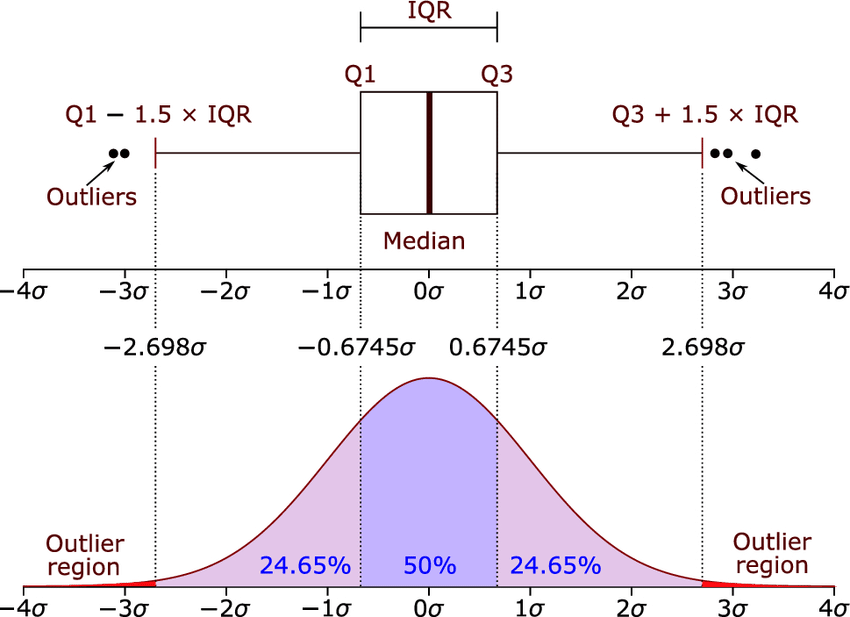

Función de discretización basada en cuantiles. "Discretiza" las variables en "cubos" de igual tamaño según el rango o según los cuantiles de muestra.

En los ejemplos anteriores, hemos definido el intervalo de puntajes para cada uno de los grados, lo que resultó en un número impar de estudiantes en cada grupo de grados. En el siguiente ejemplo, intentamos agrupar a los estudiantes en 3 grupos de grados, cada uno con el mismo número (aproximadamente) de estudiantes. Tenemos 1000 estudiantes, por lo tanto, cada contenedor debe tener aproximadamente 333 estudiantes. Los estudiantes se clasifican primero de acuerdo con sus puntajes y los tercios superior, medio e inferior de los estudiantes se asignan a las categorías de calificación de "A", "B" y "C", respectivamente.

Estos son los parámetros que usaremos en el siguiente ejemplo:

* `x`: el arreglo de entrada a agrupar. Debe ser unidimensional.
* `q`: Número de cuantiles. 10 para deciles, 4 para cuartiles, etc. Alternativamente matriz de cuantiles, e.g., `[0, .25, .5, .75, 1.]`.
* `labels`: especifica las etiquetas para los contenedores devueltos. Debe tener la misma longitud que los contenedores resultantes.
* `retbins`: (`bool`) Especifica si devolver los `(bins, labels)` o no.

In [ ]:
df['grado_qcut'], cut_bin = pd.qcut(df['score'], q = 3, labels = ['C', 'B', 'A'], retbins = True)
df.sample(15)

,score,grado_loc_between,grado_cut,grado_qcut
370,0,C,C,C
820,6,C,C,C
748,29,C,C,C
502,27,C,C,C
960,66,B,B,A
626,56,B,B,B
690,91,A,A,A
771,38,C,C,B
778,57,B,B,B
41,21,C,C,C


In [ ]:
cut_bin
# Porque hay diferencias?

array([  0.,  33.,  65., 100.])

In [ ]:
df['grado_qcut'].value_counts()

B    339
C    334
A    327
Name: grado_qcut, dtype: int64

Esta última instrucción nos ha ayudado a formar los siguientes intervalos:

*    `C: [0, 31]`
*    `B: (32, 66]`
*    `A: (67, 100]`

Podemos verificar cuántos estudiantes hay en cada categoría usando `value_counts()`. Idealmente, cada contenedor debería tener aproximadamente 333 estudiantes.

In [ ]:
df.grado_qcut.value_counts()

In [ ]:
df['grado_qcut2'], cut_bin = pd.qcut(df['score'], q = 4,
                                     labels = ['Chavalitos', 'La Chaviza', 'Ya chambean', 'Come avena'], retbins = True)
cut_bin

array([  0.,  27.,  50.,  73., 100.])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,49.834,28.588735,0.0,27.0,50.0,73.0,100.0


In [ ]:
df.grado_qcut2.value_counts()

## value_counts()
Si bien pandas `.value_counts()` se usa comúnmente para contar la cantidad de valores únicos en una serie, también se puede usar para agrupar valores en contenedores semiabiertos usando el parámetro de contenedores.

In [ ]:
df['grado_qcut2'].value_counts() # Variable nominal
# cuenta las instancias

Chavalitos     255
La Chaviza     250
Come avena     249
Ya chambean    246
Name: grado_qcut2, dtype: int64

In [ ]:
# Variable numerica
df['score'].value_counts(bins = 3, sort = False) # orden segun indice: [0 - 33.33]

(-0.101, 33.333]    334
(33.333, 66.667]    351
(66.667, 100.0]     315
Name: score, dtype: int64

In [ ]:
df['score'].value_counts(bins = 3, sort = True) # Orden descendiente segun Conteo de valores

(33.333, 66.667]    351
(-0.101, 33.333]    334
(66.667, 100.0]     315
Name: score, dtype: int64

De forma predeterminada, `.value_counts` ordena las *Series* devueltas en orden descendente de las frecuencias encontradas. Si se indica `sort = False` se ordena de acuerdo a su índice (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

El índice de la serie devuelta se refiere al rango de intervalo para cada *bin*. Los valores de la serie devuelta indican cuántos registros hay en cada contenedor.

A diferencia del ejemplo de `.qcut`, la cantidad de registros en cada uno de los contenedores no es necesariamente la misma.

`value_counts` no asigna el mismo número de registros en cada grupo de calificación, sino que divide el rango de puntajes en 3 partes iguales según los valores máximos y mínimos. Los *scores* tienen un valor mínimo de 0 y un valor máximo de 100, por lo que cada una de las 3 partes tiene un rango aproximado de $33.33$. Esto también explica por qué los límites de los contenedores están en múltiplos de 33,33 con la excepción del límite inferior izquierdo.

También podemos definir los límites de los *bins* pasando una lista de límites.

In [ ]:
df['score'].value_counts(bins = [0,50,80,100]) # Mismo resultado que en los primeros 2 ejemplos

## ACTIVIDAD
Exploremos Discretizacion con los datos de *Season Stats*:
1. Genera el Dataframe de la tabla *Season Stats*
2. Realiza limpieza, y preprocesamiento de modo que contemos con solamente los valores numericos (no nulos).
3. A partir de la variable *PTS*, crea otras variables *PTS_categories_(metodo)* que refleje 4 intervalos segun los métodos **between & loc**, **cut** y **qcut** vistos en esta sesión. Dichos bins deben estar basados en los cuartiles (Q1, Q2, Q3, Q4).